# Networkx Basics

https://networkx.org/documentation/stable/tutorial.html

## Creating a graph

In [113]:
import networkx as nx

G = nx.Graph()

## Nodes

In [114]:
G.add_node(1)
G.add_nodes_from([2, 3])
G.add_nodes_from([(4, {"color": "red"}), (5, {"color": "green"})])

In [115]:
H = nx.path_graph(10)
G.add_nodes_from(H)
G.add_node(H)

## Edges

In [116]:
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)  # Unpack edge tuple.

In [117]:
G.add_edges_from([(1, 2), (1, 3)])

In [118]:
G.add_edges_from(H.edges)

In [119]:
G.clear()

In [120]:
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")  # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, "m")

In [121]:
G.number_of_nodes()

8

In [122]:
G.number_of_edges()

3

In [123]:
DG = nx.DiGraph()
DG.add_edge(2, 1)
DG.add_edge(1, 3)
DG.add_edge(2, 4)
DG.add_edge(1, 2)
assert list(DG.successors(2)) == [1, 4]
assert list(DG.successors(1)) == [3, 2]
# This follows the order of the adjacencies.
assert list(DG.edges) == [(2, 1), (2, 4), (1, 3), (1, 2)]
DG.adj

AdjacencyView({2: {1: {}, 4: {}}, 1: {3: {}, 2: {}}, 3: {}, 4: {}})

## Examining elements of a graph

In [124]:
list(G.nodes)

[1, 2, 3, 'spam', 's', 'p', 'a', 'm']

In [125]:
list(G.edges)

[(1, 2), (1, 3), (3, 'm')]

In [126]:
list(G.adj[1]), list(G.neighbors(1))

([2, 3], [2, 3])

In [127]:
G.degree[1]  # The number of edges incident to 1

2

In [128]:
G.edges([2, "m"])

EdgeDataView([(2, 1), ('m', 3)])

In [129]:
G.degree([2, 3])

DegreeView({2: 1, 3: 2})

## Removing elements from a graph

In [130]:
list(G.nodes)

[1, 2, 3, 'spam', 's', 'p', 'a', 'm']

In [131]:
G.remove_node(2)
G.remove_nodes_from("spam")
list(G.nodes)

[1, 3, 'spam']

## Using the graph constructors

In [132]:
G.add_edge(1, 2)
# Create a DiGraph using the connections from G.
H = nx.DiGraph(G)
list(H.edges())

[(1, 3), (1, 2), (3, 1), (2, 1)]

In [133]:
edgelist = [(0, 1), (1, 2), (2, 3)]
# Create a graph from an edge list.
H = nx.Graph(edgelist)
list(H.edges())

[(0, 1), (1, 2), (2, 3)]

In [134]:
adjacency_dict = {0: (1, 2), 1: (0, 2), 2: (0, 1)}
# Create a graph dict mapping nodes to nbrs.
H = nx.Graph(adjacency_dict)
list(H.edges())

[(0, 1), (0, 2), (1, 2)]

## Accessing edges and neighbors

In [135]:
G = nx.Graph([(1, 2, {"color": "yellow"})])
G[1]  # Same as G.adj[1]

AtlasView({2: {'color': 'yellow'}})

In [137]:
G[1][2]

{'color': 'yellow'}

In [138]:
G.edges[1, 2]

{'color': 'yellow'}

In [142]:
G.add_edge(1, 3)
G[1][3]["color"] = "blue"
G.edges[1, 2]["color"] = "red"
G.edges[1, 2]

{'color': 'red'}

In [146]:
# For unidirected graph, adjacency iteration sees each edge twice.
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in FG.adj.items():
    for nbr, eattr in nbrs.items():
        wt = eattr["weight"]
        if wt < 0.5:
            print(f"({n}, {nbr}, {wt:.3})")

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


In [147]:
for u, v, wt in FG.edges.data("weight"):
    if wt < 0.5:
        print(f"({u}, {v}, {wt:.3})")

(1, 2, 0.125)
(3, 4, 0.375)


## Adding attributes to graphs, nodes, and edges

In [151]:
G = nx.Graph(day="Friday")
G.graph

{'day': 'Friday'}

In [153]:
G.graph["day"] = "Monday"
G.graph

{'day': 'Monday'}

In [154]:
G.add_node(1, time="5pm")
G.add_nodes_from([3], time="2pm")
G.nodes[1]

{'time': '5pm'}

In [155]:
G.nodes[1]["room"] = 714
G.nodes.data()

NodeDataView({1: {'time': '5pm', 'room': 714}, 3: {'time': '2pm'}})

## Edge Attributes

In [164]:
G.add_edge(1, 2, weight=4.7)
G.add_edges_from([(3, 4), (4, 5)], color="red")
G.add_edges_from([(1, 2, {"color": "blue"}), (2, 3, {"weight": 8})])
G[1][2]["weight"] = 4.7
G.edges[3, 4]["weight"] = 4.2

## Directed graphs

In [165]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
DG.out_degree(1, weight="weight")

0.5

In [166]:
DG.degree(1, weight="weight")

1.25

In [167]:
list(DG.successors(1))

[2]

In [168]:
list(DG.neighbors(1))

[2]

In [169]:
H = nx.Graph(G)  # create an undirected graph H from a directed graph G

## Multigraphs

In [172]:
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])
dict(MG.degree(weight="weight"))

{1: 1.25, 2: 1.75, 3: 0.5}

In [179]:
GG = nx.Graph()
for n, nbrs in MG.adjacency():
    for nbr, edict in nbrs.items():
        minvalue = min([d["weight"] for d in edict.values()])
        GG.add_edge(n, nbr, weight=minvalue)
nx.shortest_path(GG, 1, 3)

[1, 2, 3]

## Analyzing graphs

In [181]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node("spam")
list(nx.connected_components(G))

[{1, 2, 3}, {'spam'}]

In [182]:
sorted(d for n, d in G.degree())

[0, 1, 1, 2]

In [183]:
nx.clustering(G)

{1: 0, 2: 0, 3: 0, 'spam': 0}

In [187]:
sp = dict(nx.all_pairs_shortest_path(G))
sp[3]

{3: [3], 1: [3, 1], 2: [3, 1, 2]}

## Drawing graphs

In [188]:
import matplotlib.pyplot as plt

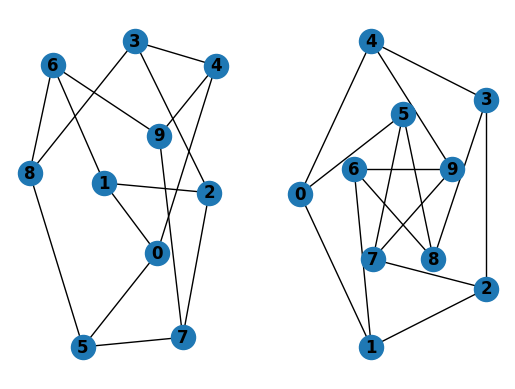

In [189]:
G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight="bold")
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight="bold")

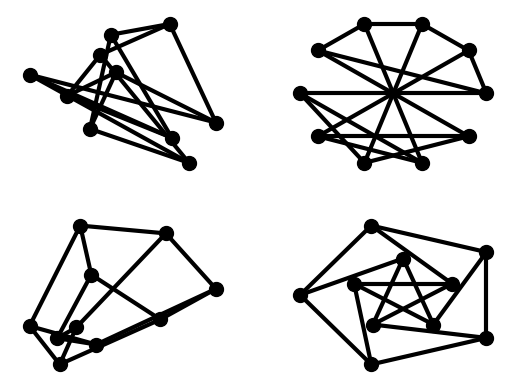

In [192]:
options = {
    "node_color": "black",
    "node_size": 100,
    "width": 3,
}
subax1 = plt.subplot(221)
nx.draw_random(G, **options)
subax2 = plt.subplot(222)
nx.draw_circular(G, **options)
subax3 = plt.subplot(223)
nx.draw_spectral(G, **options)
subax4 = plt.subplot(224)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], **options)

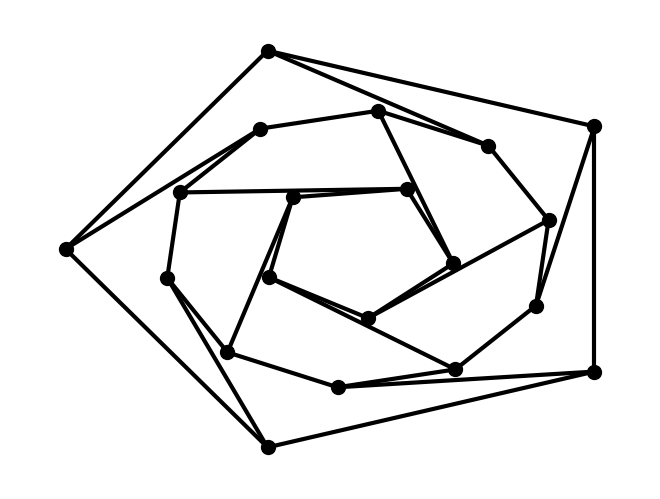

In [196]:
G = nx.dodecahedral_graph()
shells = [[2, 3, 4, 5, 6], [8, 1, 0, 19, 18, 17, 16, 15, 14, 7], [9, 10, 11, 12, 13]]
nx.draw_shell(G, nlist=shells, **options)

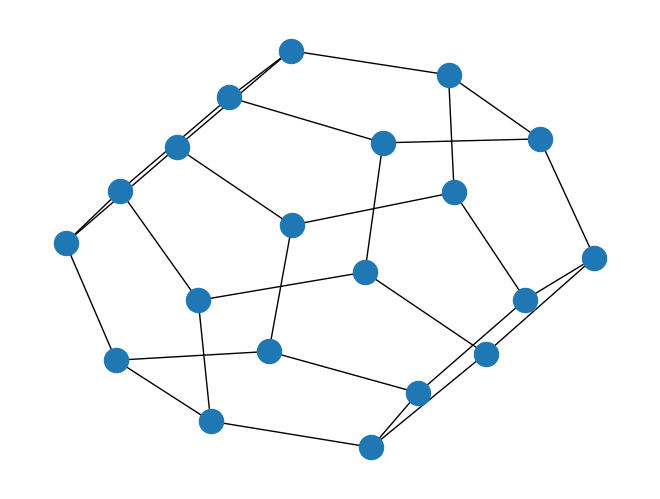

In [197]:
nx.draw(G)
plt.savefig("path.png")

In [199]:
# from networkx.drawing.nx_pydot import write_dot

# pos = nx.nx_agraph.graphviz_layout(G)
# nx.draw(G, pos=pos)
# write_dot(G, "file.dot")

ImportError: requires pygraphviz http://pygraphviz.github.io/